In [182]:
import matplotlib.pyplot as plt
from matplotlib.axes import Axes
import numpy as np

def plot_single(axes:Axes, train_metric:np.ndarray=None, val_metric:np.ndarray=None, test_metric:np.ndarray=None, axes_x_name:str="", axes_y_name:str="", metric_name:str="Metric", show:str|int|list[int]='none', start_check:int|float=0.2, marker:bool=False, best_k:int=3, higher_is_better:bool=False):
    marker = '.' if (marker) else None
    
    axes.set_xlabel(axes_x_name)
    axes.set_ylabel(axes_y_name)
    
    _= axes.plot(train_metric, label="train", marker=marker)
    _= axes.plot(val_metric,   label="val",   marker=marker)
    
    if isinstance(start_check, float):
        start_check= round(start_check*len(train_metric))
    
    val_ascending_indeces= np.argsort(val_metric[start_check:]) + start_check
    best_k_indeces= val_ascending_indeces[-best_k:] if higher_is_better else val_ascending_indeces[:best_k]
    
    if isinstance(show, int):
        best_k_indeces = np.array([show])
        show = 'points'
    if isinstance(show, list) and isinstance(show[0], int):
        best_k_indeces = np.array(show)
        show = 'points'
    
    color= None
    if (show in ['full', 'both']):
        plot_object= axes.plot(test_metric, label="test", marker=marker)
        color = plot_object[0].get_color()
    if (show in ['points', 'both']):
        _= axes.plot(best_k_indeces, test_metric[best_k_indeces], label="test values", marker='o', linestyle="None", color=color)
        
        ymin, _ = axes.get_ylim()
        axes.vlines(x=best_k_indeces, ymin=ymin, ymax=test_metric[best_k_indeces], colors='gray', linestyles='--')
        
        vertical_offset= 10 if higher_is_better else -15
        for idx in best_k_indeces:
            test_value = test_metric[idx]                
            axes.annotate(
                text        = f"{test_value:.4f}",
                xy          = (idx, test_value),
                textcoords  = "offset points",
                xytext      = (0,vertical_offset),
                ha          = "center",
                fontsize    = 9
            )
            
            axes.annotate(
                text        = idx,
                xy          = (idx, 0),
                xycoords    = axes.get_xaxis_transform(),
                xytext      = (0, 0),
                textcoords  = "offset points",
                ha          = "center",
                va          = "top",
                fontsize    = 9,
                bbox        = dict(boxstyle="round,pad=0.3", fc="gray", alpha=0.8, edgecolor="gray")
            )
    
    axes.set_title(metric_name, loc="left")
    axes.grid(True)
    axes.legend()

In [183]:
from classes.Metric_manager import Metrics
from constant.constants_main import METRICS_EXTENTION
from matplotlib.axes import Axes
import matplotlib.pyplot as plt
import os

metrics_to_plot_idx_filename = 0
metrics_to_plot_idx_title = 1

folders_and_titles_idx_folder = 0
folders_and_titles_idx_title = 1

def plot_grid(metrics_to_plot:list[tuple[str,str]], folders_and_titles:list[tuple[str,list[str]]], show:str|int|list[int]='none', start_check:int|float=0.2, marker:bool=False, best_k:int=3, higher_is_better:bool=False, save_path:str=None, dpi:int=200):
    num_rows = len(metrics_to_plot)
    num_cols = len(folders_and_titles)
    
    figure, axes = plt.subplots(num_rows, num_cols, figsize=(10*num_cols, 6*num_rows), sharey='row')

    for num_col,folder_and_title in enumerate(folders_and_titles):
        col_title = "\n".join(folder_and_title[folders_and_titles_idx_title])
        
        folder = folder_and_title[folders_and_titles_idx_folder]
        folder= os.path.join(folder, sorted(os.listdir(folder), key=lambda x: int(x.split("_")[-1]) if x.split("_")[-1].isdigit() else 0)[-1])

        for num_row,metric_to_plot in enumerate(metrics_to_plot):
            metric = metric_to_plot[metrics_to_plot_idx_filename]
            title = metric_to_plot[metrics_to_plot_idx_title]
            
            folder_epoch = int(folder.split("_")[-1])
            file = os.path.join(folder, f"{metric}_{folder_epoch}.{METRICS_EXTENTION}")
            
            ax:Axes = axes[num_row, num_col]
            ax.tick_params(labelleft=True)
            
            # Add row label on the left side of each row (first column only)
            # if num_col == 0:
            #     ax.set_ylabel(metric_to_plot[metrics_to_plot_idx_title], fontsize=12, rotation=0, labelpad=40)
            #     ax.yaxis.set_label_position("left")

            # Add column label on the top of each column (first row only)
            metric_name = col_title if (num_row==0) else ""
            
            plot_single(
                ax,
                *Metrics.load(file),
                metric_name=metric_name,
                axes_y_name=title,
                show=show,
                start_check=start_check,
                marker=marker,
                best_k=best_k,
                higher_is_better=higher_is_better
            )
            
            if num_row == 0:
                ax.text(
                    x=0.5,
                    y=1.0, 
                    s=f"Fig. [{num_col+1}]",
                    transform=ax.transAxes,
                    fontsize=16,
                    color="blue",
                    va='bottom',
                )

    plt.tight_layout()
    plt.show()
    if (save_path is not None):
        figure.savefig(save_path, dpi=dpi)

In [184]:
metrics_to_plot = [("loss", "loss"), ("weighted_accuracy", "weighted accuracy"), ("f1-score", "f1-score"), ("avg_prob_class_1", "probability class seizure")]

folders_and_titles = [
    (
        "../metrics/esperimento base 0 - grezzo",
        [
        "2 Celle",
        "GL : Graph Attention (dim 70, softplus) - 1 layer - 1 head",
        "GGNN : 5 steps",
        "LR : 1e-4 (cross-entropy)",
        "DATI : 12s grezzi (impuri) - cross-correlazione",
        "BATCH : 64 - [15.700]"
        ]
    ),
    (
        "../metrics/esperimento base 0 - fft",
        [
        "2 Celle",
        "GL : Graph Attention (dim 70, softplus) - 1 layer - 1 head",
        "GGNN : 5 steps",
        "LR : 1e-4 (cross-entropy)",
        "DATI : 12s fft (impuri) - cross-correlazione",
        "BATCH : 64 - [15.700]"
        ]
    ),
    (
        "../metrics/esperimento base 1 - sampler",
        [
        "2 Celle",
        "GL : Graph Attention (dim 70, softplus) - 1 layer - 1 head",
        "GGNN : 5 steps",
        "LR : 1e-4 (cross-entropy)",
        "DATI : 12s fft (impuri) - cross-correlazione",
        "BATCH : 64 - (2% sampler) [15.700]"
        ]
    ),
    (
        "../metrics/esperimento base 1 - sampler & pos_weight/",
        [
        "2 Celle",
        "GL : Graph Attention (dim 70, softplus) - 1 layer - 1 head",
        "GGNN : 5 steps",
        "LR : 1e-4 (weighted cross-entropy)",
        "DATI : 12s fft (impuri) - cross-correlazione",
        "BATCH : 64 - (2% sampler) [15.700]"
        ]
    ),
    (
        "../metrics/esperimento base 2 - (1) layer/",
        [
        "2 Celle",
        "GL : GAT (dim 70, softplus) - 1 layer - 1 head",
        "GGNN : 5 steps",
        "LR : 1e-4 (weighted cross-entropy)",
        "DATI : 12s fft (impuri) - cross-correlazione",
        "BATCH : 64 - (2% sampler) [15.700]"
        ]
    ),
    (
        "../metrics/esperimento base 3 - (1) head/",
        [
        "2 Celle",
        "GL : GAT (dim 128, softplus) - 1 layer - 1 head",
        "GGNN : 5 steps",
        "LR : 1e-4 (weighted cross-entropy)",
        "DATI : 12s fft (impuri) - cross-correlazione",
        "BATCH : 64 - (2% sampler) [15.700]"
        ]
    ),
    (
        "../metrics/esperimento base 3 - (3) heads/",
        [
        "2 Celle",
        "GL : GAT (dim 128, softplus) - 1 layer - 3 heads",
        "GGNN : 5 steps",
        "LR : 1e-4 (weighted cross-entropy)",
        "DATI : 12s fft (impuri) - cross-correlazione",
        "BATCH : 64 - (2% sampler) [15.700]"
        ]
    ),
    (
        "../metrics/esperimento normale 1/",
        [
        "2 Celle",
        "GL : GAT (dim 128, softplus) - 1 layer - 3 heads",
        "GGNN : 5 steps",
        "LR : 1e-4 & 1e-5 (weighted cross-entropy)",
        "DATI : 12s fft (impuri) - cross-correlazione",
        "BATCH : 64 & 96 - (2% sampler) [42.000]"
        ]
    ),
    (
        "../metrics/esperimento normale 1 - GRU/",
        [
        "2 Celle - GRU (128)",
        "GL : GAT (dim 128, softplus) - 1 layer - 3 heads",
        "GGNN : 5 steps",
        "LR : 1e-4 & 1e-5 (weighted cross-entropy)",
        "DATI : 12s fft (impuri) - cross-correlazione",
        "BATCH : 64 & 96 - (2% sampler) [42.000]"
        ]
    )
]

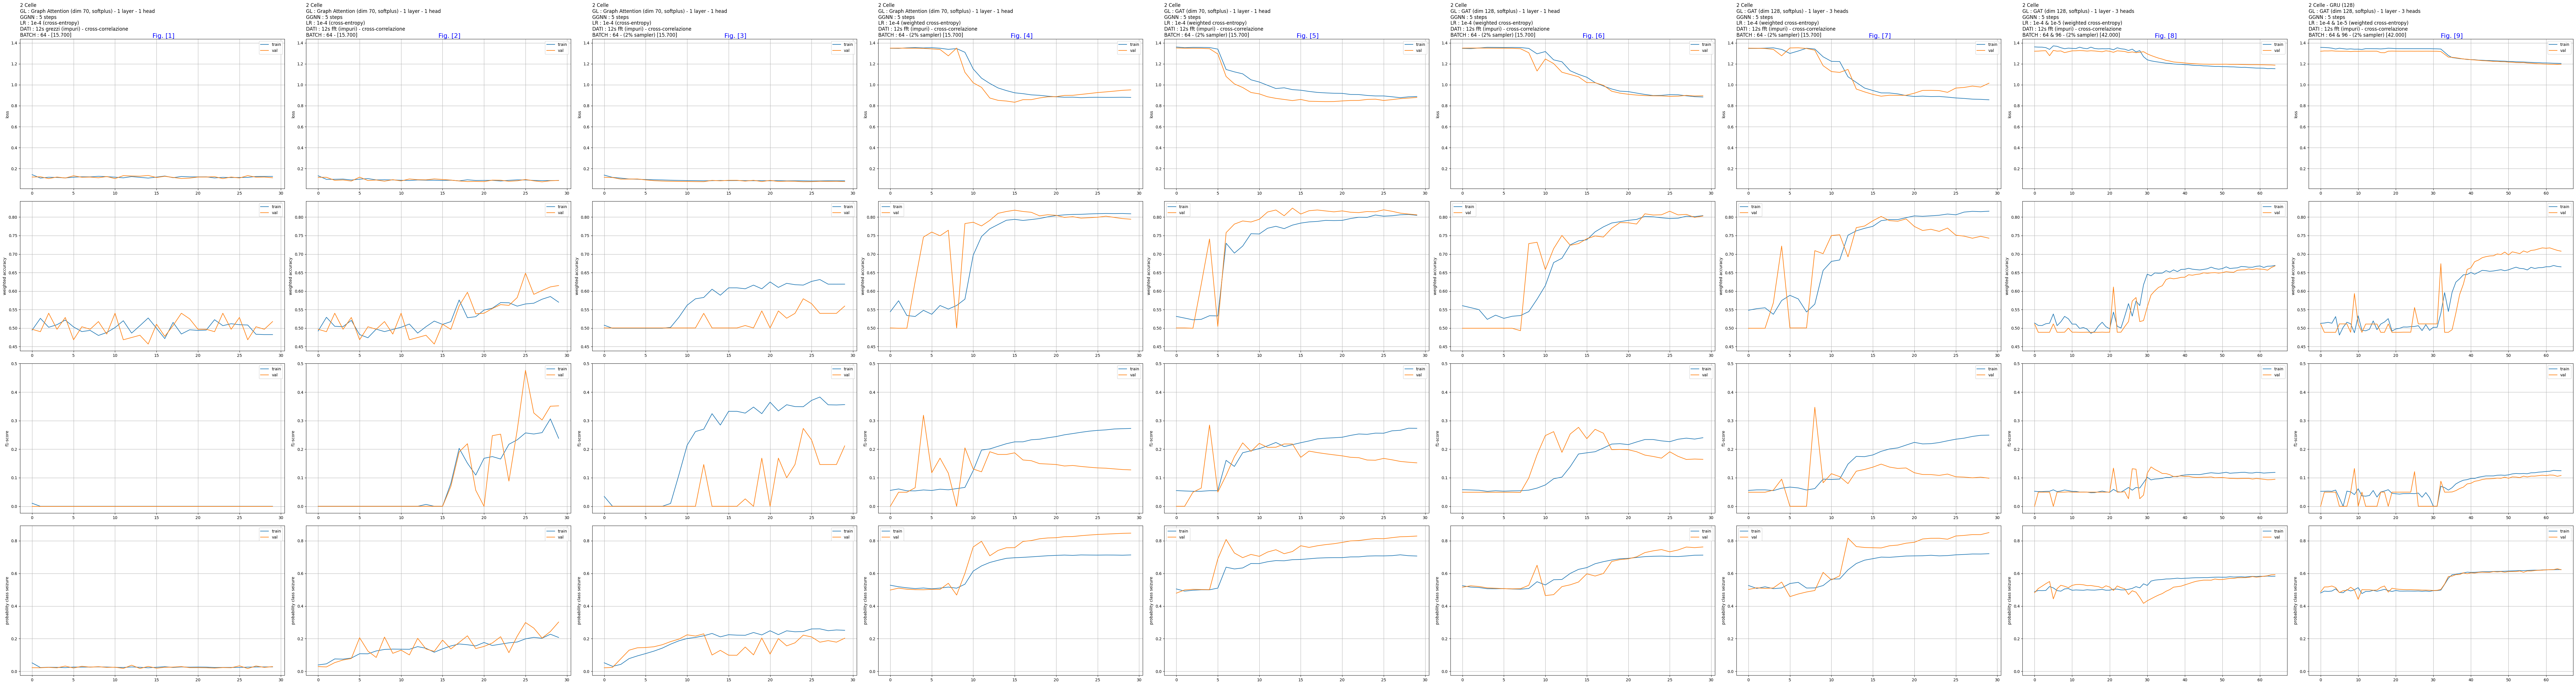

In [185]:
plot_grid(
    metrics_to_plot=metrics_to_plot,
    folders_and_titles=folders_and_titles,
    show='none',
    start_check=0,
    marker=False,
    best_k=3,
    higher_is_better=False,
    save_path="../metrics/plots/figure"
)